In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import seaborn as sbn
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train_V2.csv', 'sample_submission_V2.csv', 'test_V2.csv']


In [2]:
data_train = pd.read_csv('../input/train_V2.csv')
data_test = pd.read_csv('../input/test_V2.csv')


In [3]:
data_train.head()


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
data_test.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,0,0,0,0.00,1884,squad-fpp,28,28,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,0,2,1,361.90,1811,duo-fpp,48,47,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,0,0,0,0.00,1793,squad-fpp,28,27,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,0,0,0,0.00,1834,duo-fpp,45,44,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,0,3,1,60.06,1326,squad-fpp,28,27,1480,1,0.0,0,0.0,0,0,2963.0,4,0


> #Feature Extraction and Feature Analysis

Coloumn Info for test and train data set

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934174 entries, 0 to 1934173
Data columns (total 28 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
dtypes: float64(5), int64(19), object(4)
memory usage: 413.2+ MB


In [7]:
data_train.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [8]:
data_test.isna().sum(
)

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

Since the training data consist of 1 null value row we cn remove the data

In [9]:
data_train.shape

(4446966, 29)

In [10]:
data_test.shape

(1934174, 28)

In [11]:
data_train.dropna(inplace=True)

Now both the train nd test data are null value free hence we can proceed forward
Now,
The data set consist of around 47, lakhs instances and various instance has same match id, that is they are in the smae match hence we can introduce a new feature, which consist of number of player in a given match

In [12]:
data_train.groupby('matchId')[('matchId')].count()

matchId
0000a43bce5eec     95
0000eb01ea6cdd     98
0002912fe5ed71     95
0003b92987589e    100
0006eb8c17708d     93
00077604e50a63     98
00086c74bb4efc     98
00086e740a5804     98
001125344b660c     96
001360264d4b5f     91
0014d9d1b0aff6     94
001616ed5da99b     97
0016fe3ee17ce7     97
00177a6ce4dfb5     92
00188d50e054f5     92
001937f739426c     95
0019bc34b3c58e     97
0019d729577e9c     94
001cd8e7e6b737     24
001e5e4799a31c     92
001e7bc06b1611     59
001eeedf57047a     99
00200fe5d9aae5     99
0022adebf59be6     96
0022e660571ee8     97
00232f9d9c5421     96
0025477f88bbd9     94
002771bd25fe0e     92
0027a504cd3b0c     99
0027b1ffb2e346     17
                 ... 
ffdebe280440e8     86
ffdf8e9dc18596     98
ffdff4a21177ea     92
ffe08b9747a59f     94
ffe21d8fafaf43     96
ffe2a50b7023fb     89
ffe2ee39f210ff     92
ffe6c9fd39b935     98
ffe71c86ca1d81     97
ffe7d37a82297b     98
ffe94ff48407e7     93
ffead5be0b50e8     98
ffeaf5f7073d41     89
ffeb2131284e45     94
ff

In [13]:
data_test.groupby('matchId')['matchId'].transform('count')

0           92
1           96
2           94
3           89
4           95
5           98
6           98
7          100
8           91
9           96
10          94
11          98
12          98
13          96
14          94
15          97
16          92
17          96
18          98
19         100
20          94
21          97
22         100
23         100
24          95
25          93
26          99
27          93
28          91
29          97
          ... 
1934144     92
1934145     98
1934146     98
1934147     93
1934148     95
1934149     97
1934150     94
1934151     98
1934152     94
1934153     97
1934154     90
1934155     98
1934156     97
1934157     99
1934158     92
1934159     94
1934160     92
1934161     91
1934162     99
1934163     90
1934164     96
1934165     97
1934166     96
1934167     98
1934168     99
1934169     76
1934170     92
1934171     94
1934172     96
1934173     92
Name: matchId, Length: 1934174, dtype: int64

In [14]:
data_train['Match Played'] = data_train.groupby('matchId')['matchId'].transform('count')
data_test['Match Played'] = data_test.groupby('matchId')['matchId'].transform('count')


moving on lets represent the data using graphical represent and understand the data in both train and test set

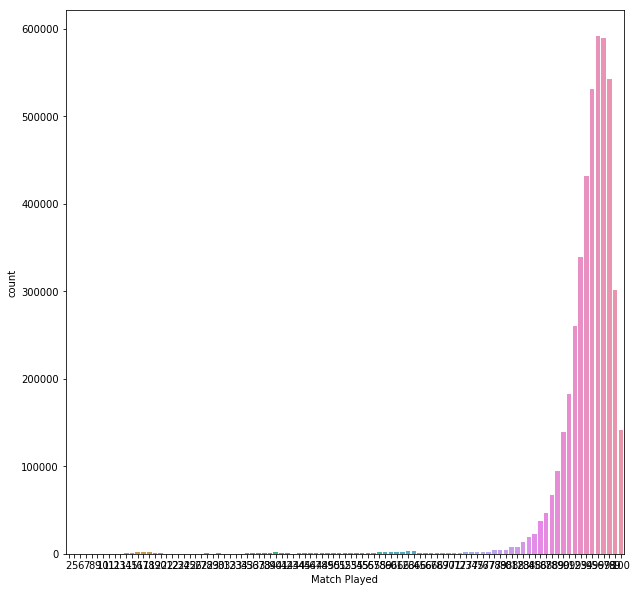

In [15]:
plt.subplots(figsize =(10,10))
sbn.countplot(data_train['Match Played'])

In [16]:
data_train = pd.get_dummies(data_train,columns=['matchType'])


In [17]:
data_train.shape

(4446965, 45)

In [18]:
data_test  = pd.get_dummies(data_test,columns= ['matchType'])

In [19]:

data_test.shape

(1934174, 44)

In [20]:
data_train['totalDistance'] = data_train['rideDistance']+data_train['swimDistance'] + data_train['walkDistance']

In [21]:
data_test['totalDistance'] = data_test['rideDistance']+data_test['swimDistance'] + data_test['walkDistance']

applying random forest regressor to learn the important feature but we need to drop Id, PlayerID , Match Id since they are of object type and we already extracted the information 

In [22]:
data_train.drop(labels=['Id','groupId','matchId'],inplace = True,axis=1)
test_id=data_test['Id']
data_test.drop(labels=['Id','groupId','matchId'],inplace = True,axis=1)

In [23]:
data_train.shape

(4446965, 43)

In [24]:
rdata=data_train.sample(3500000)

In [25]:
y = rdata['winPlacePerc']
X_data = rdata.drop(labels='winPlacePerc',axis=1)

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y,test_size=.3)

In [27]:
rfr = RandomForestRegressor(n_estimators=35, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)

In [28]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [29]:
y_pred = rfr.predict(X_test)

In [30]:
mean_squared_error(y_pred,y_test)

0.0071178284382629135

In [31]:
mean_absolute_error(y_pred,y_test)

0.05995665650053152

In [32]:
new_data =pd.DataFrame(sorted(zip(rfr.feature_importances_, X_data.columns)),columns=['Value','Feature'])

In [33]:
new_data # holdiing the column name and its importance value

,Value,Feature
0,6.436913e-07,matchType_flarefpp
1,7.345527e-07,matchType_normal-duo
2,1.314938e-06,matchType_crashtpp
3,1.328297e-06,matchType_normal-solo
4,2.168891e-06,matchType_normal-squad
5,5.825151e-06,matchType_flaretpp
6,1.999011e-05,matchType_normal-solo-fpp
7,3.924146e-05,roadKills
8,3.966589e-05,vehicleDestroys
9,6.126452e-05,matchType_crashfpp


In [34]:
new_data = new_data.sort_values(by='Value',ascending=False)[:25]

In [35]:
new_data.shape

(25, 2)

In [36]:

cols=new_data.Feature.values


In [37]:
X_train,X_test,y_train,y_test = train_test_split(X_data[cols],y,test_size=.3)

In [38]:
rfr = RandomForestRegressor(n_estimators=25, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)

In [39]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [40]:
y_pred = rfr.predict(X_test)

In [41]:
mean_squared_error(y_pred,y_test)

0.006815023365861251

In [42]:
mean_absolute_error(y_pred,y_test)

0.05817391362240545

In [58]:
out = rfr.predict(data_test[cols])

In [63]:
outdf = pd.DataFrame(data = out,columns=['winPlacePerc'])

In [64]:
submisson_V2 = pd.concat([test_id,outdf],axis=1)